We are using a subset of the MIMIC-III tables. The following tables are used to define and track patient stays:

ADMISSIONS: Every unique hospitalization for each patient in the database (defines HADM_ID)

ICUSTAYS: Every unique ICU stay in the database (defines ICUSTAY_ID)

PATIENTS: Every unique patient in the database (defines SUBJECT_ID)

The following tables contain data collected in the critical care unit:

DATETIMEEVENTS: All recorded observations which are dates, for example time of dialysis or insertion of lines.


The following tables contain data collected in the hospital record system:

CPTEVENTS: Procedures recorded as Current Procedural Terminology (CPT) codes

DIAGNOSES_ICD: Hospital assigned diagnoses, coded using the International Statistical Classification of Diseases and Related Health Problems (ICD) system

PRESCRIPTIONS: Medications ordered, and not necessarily administered, for a given patient

The following tables are dictionaries:

D_ICD_DIAGNOSES: Dictionary of International Statistical Classification of Diseases and Related Health Problems (ICD) codes relating to diagnoses

In [13]:
import pandas as pd

import pandas as pd

# Load the ADMISSIONS dataset
admissions_df = pd.read_csv('ADMISSIONS.csv')

# Convert the ADMITTIME and DISCHTIME columns to datetime
admissions_df['ADMITTIME'] = pd.to_datetime(admissions_df['ADMITTIME'])
admissions_df['DISCHTIME'] = pd.to_datetime(admissions_df['DISCHTIME'])

# Calculate the length of stay for each admission
admissions_df['LENGTH_OF_STAY'] = (admissions_df['DISCHTIME'] - admissions_df['ADMITTIME']).dt.total_seconds() / (24 * 60 * 60)

# Print the first few rows of the DataFrame
display(admissions_df.head())



,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,LENGTH_OF_STAY
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1,1.144444
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1,5.496528
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1,6.768056
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1,2.856944
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1,3.534028


In [14]:
# Handle missing data, for now we just impute with the most commonly occuring value
def handle_missing_data(df):
    for col in df.columns:
        if df[col].dtype == 'object':  # Categorical column
            most_common_cat = df[col].value_counts().idxmax()
            df[col] = df[col].fillna(most_common_cat)
        else:  # Numeric column
            df[col] = df[col].fillna(df[col].median())
    return df

admissions_df = handle_missing_data(admissions_df)

In [15]:
admissions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ROW_ID                58976 non-null  int64         
 1   SUBJECT_ID            58976 non-null  int64         
 2   HADM_ID               58976 non-null  int64         
 3   ADMITTIME             58976 non-null  datetime64[ns]
 4   DISCHTIME             58976 non-null  datetime64[ns]
 5   DEATHTIME             58976 non-null  object        
 6   ADMISSION_TYPE        58976 non-null  object        
 7   ADMISSION_LOCATION    58976 non-null  object        
 8   DISCHARGE_LOCATION    58976 non-null  object        
 9   INSURANCE             58976 non-null  object        
 10  LANGUAGE              58976 non-null  object        
 11  RELIGION              58976 non-null  object        
 12  MARITAL_STATUS        58976 non-null  object        
 13  ETHNICITY       

Exploring file: PATIENTS.csv

First few rows:
   ROW_ID  SUBJECT_ID GENDER        DOB        DOD   DOD_HOSP DOD_SSN  \
0     234         249      F 2075-03-13        NaT        NaT     NaT   
1     235         250      F 2164-12-27 2188-11-22 2188-11-22     NaT   
2     236         251      M 2090-03-15        NaT        NaT     NaT   
3     237         252      M 2078-03-06        NaT        NaT     NaT   
4     238         253      F 2089-11-26        NaT        NaT     NaT   

   EXPIRE_FLAG  
0            0  
1            1  
2            0  
3            0  
4            0  

Summary statistics:
              ROW_ID    SUBJECT_ID GENDER                  DOB  \
count   46520.000000  46520.000000  46520                46520   
unique           NaN           NaN      2                32540   
top              NaN           NaN      M  2109-06-07 00:00:00   
freq             NaN           NaN  26121                    7   
first            NaN           NaN    NaN  1800-07-02 00:00:00

<ipython-input-4-802aa2172fee>:32: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df.describe(include='all'))
<ipython-input-4-802aa2172fee>:32: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df.describe(include='all'))
<ipython-input-4-802aa2172fee>:32: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df.describe(include='all'))
<ipython-input-4-802aa2172fee>:32: FutureWarni

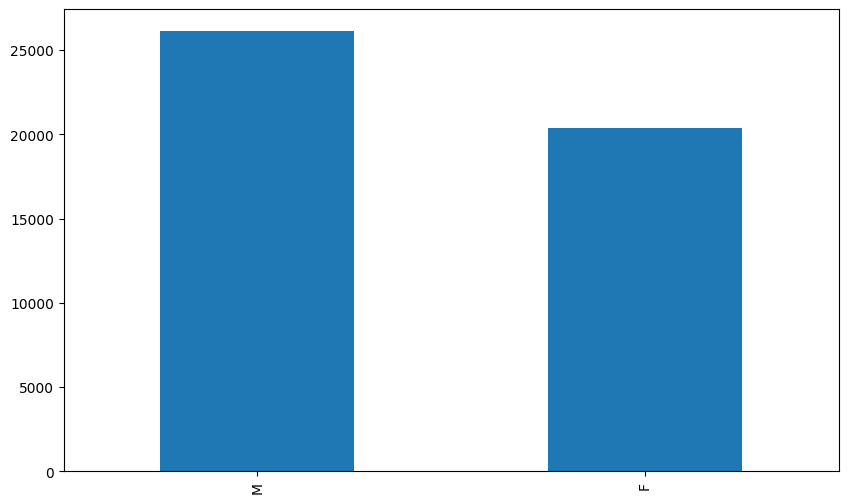


Correlation matrix:


<ipython-input-4-802aa2172fee>:58: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


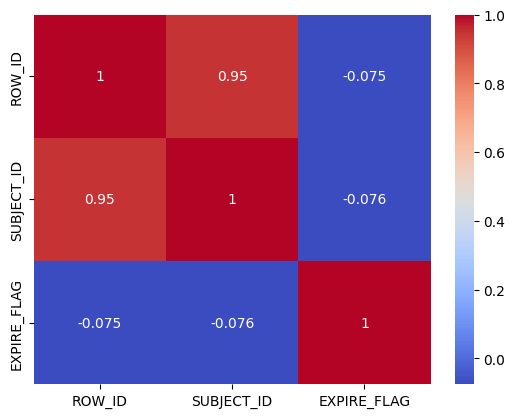


--------------------------------------------------

Exploring file: ADMISSIONS.csv

First few rows:
   ROW_ID  SUBJECT_ID  HADM_ID           ADMITTIME           DISCHTIME  \
0      21          22   165315 2196-04-09 12:26:00 2196-04-10 15:54:00   
1      22          23   152223 2153-09-03 07:15:00 2153-09-08 19:10:00   
2      23          23   124321 2157-10-18 19:34:00 2157-10-25 14:00:00   
3      24          24   161859 2139-06-06 16:14:00 2139-06-09 12:48:00   
4      25          25   129635 2160-11-02 02:06:00 2160-11-05 14:55:00   

  DEATHTIME ADMISSION_TYPE         ADMISSION_LOCATION  \
0       NaT      EMERGENCY       EMERGENCY ROOM ADMIT   
1       NaT       ELECTIVE  PHYS REFERRAL/NORMAL DELI   
2       NaT      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
3       NaT      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
4       NaT      EMERGENCY       EMERGENCY ROOM ADMIT   

          DISCHARGE_LOCATION INSURANCE LANGUAGE           RELIGION  \
0  DISC-TRAN CANCER/CHLDRN H   Private   

<ipython-input-4-802aa2172fee>:32: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df.describe(include='all'))
<ipython-input-4-802aa2172fee>:32: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df.describe(include='all'))
<ipython-input-4-802aa2172fee>:32: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df.describe(include='all'))
<ipython-input-4-802aa2172fee>:32: FutureWarni

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ROW_ID                58976 non-null  int64         
 1   SUBJECT_ID            58976 non-null  int64         
 2   HADM_ID               58976 non-null  int64         
 3   ADMITTIME             58976 non-null  datetime64[ns]
 4   DISCHTIME             58976 non-null  datetime64[ns]
 5   DEATHTIME             5854 non-null   datetime64[ns]
 6   ADMISSION_TYPE        58976 non-null  object        
 7   ADMISSION_LOCATION    58976 non-null  object        
 8   DISCHARGE_LOCATION    58976 non-null  object        
 9   INSURANCE             58976 non-null  object        
 10  LANGUAGE              33644 non-null  object        
 11  RELIGION              58518 non-null  object        
 12  MARITAL_STATUS        48848 non-null  object        
 13  ETHNICITY       

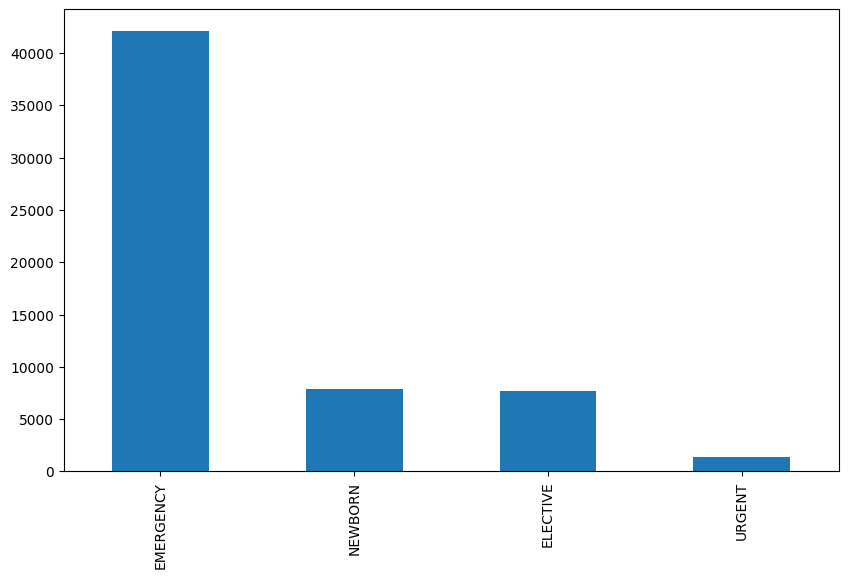


Column: ADMISSION_LOCATION


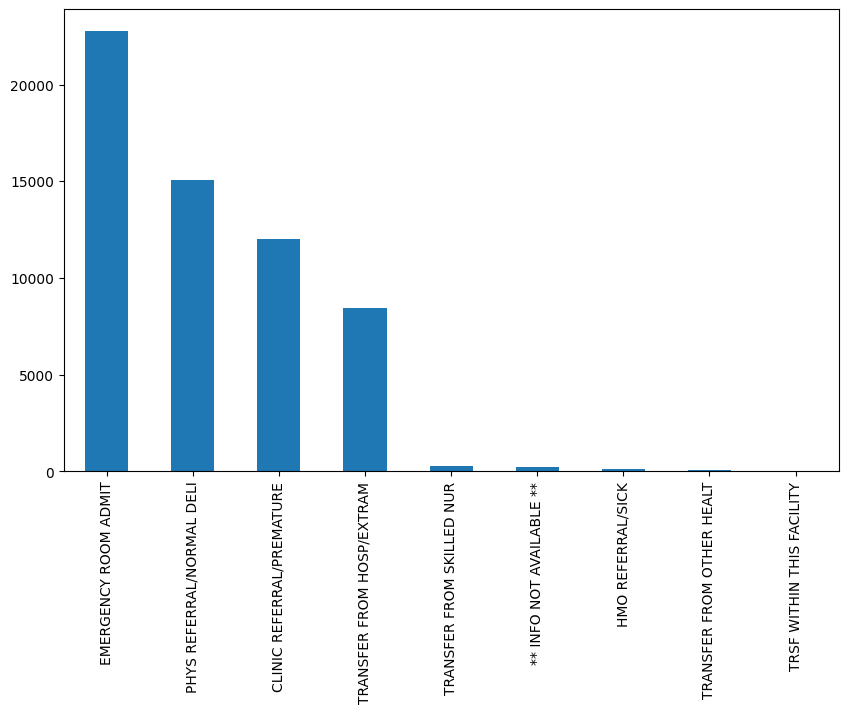


Column: DISCHARGE_LOCATION


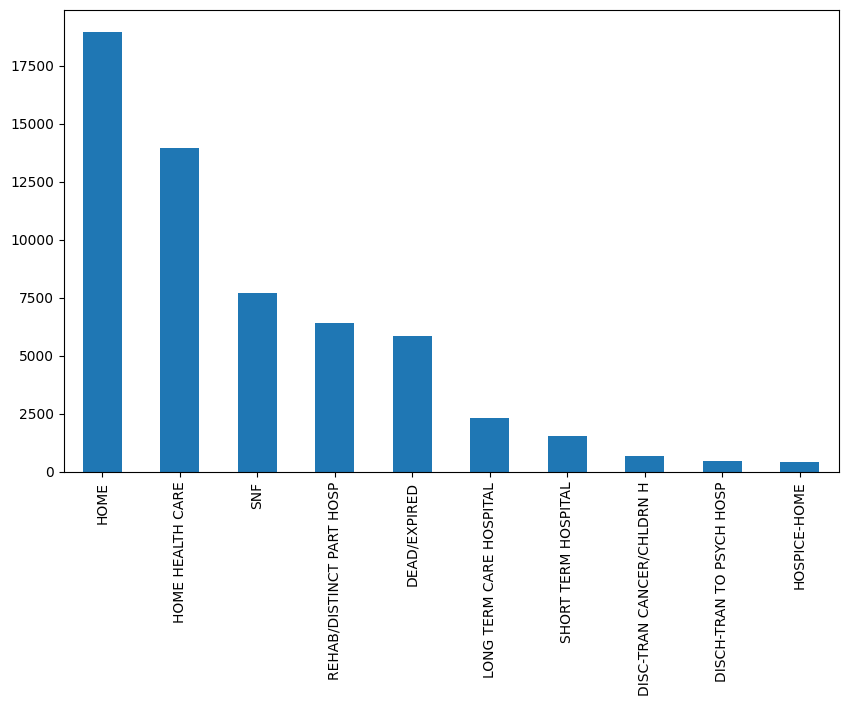


Column: INSURANCE


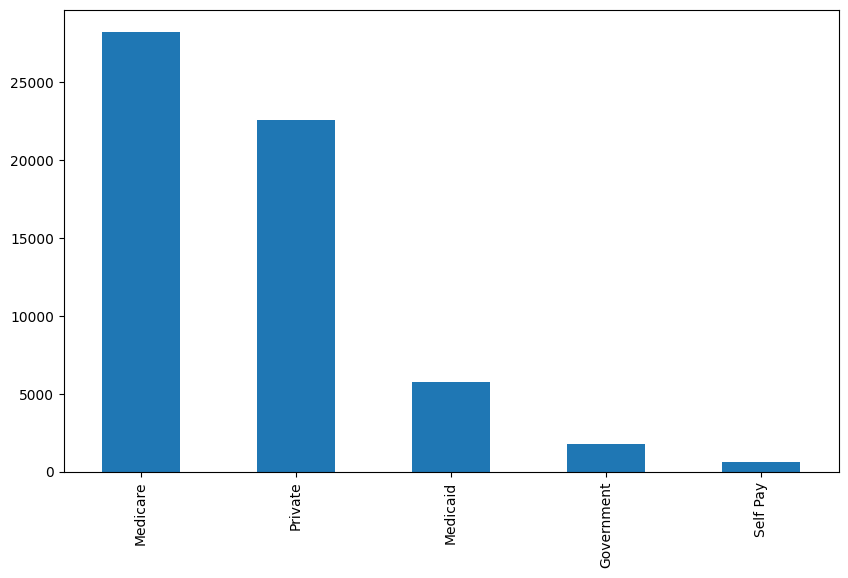


Column: LANGUAGE


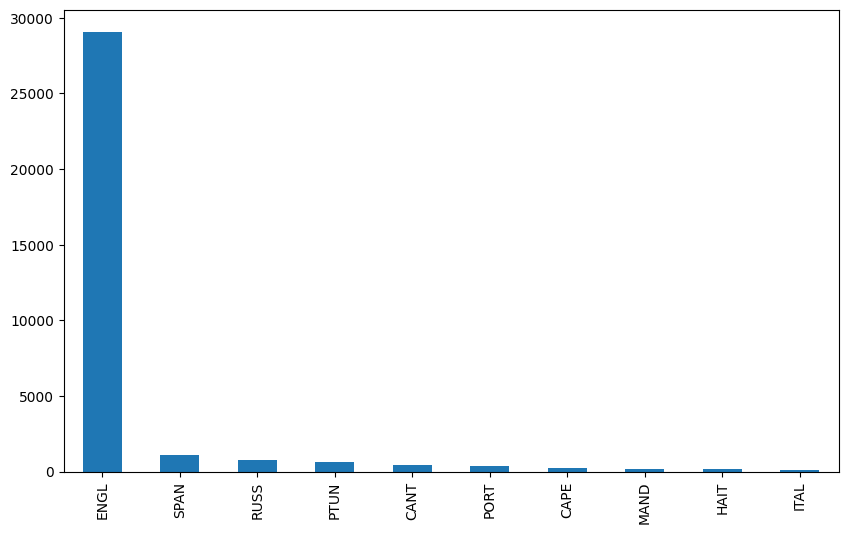


Column: RELIGION


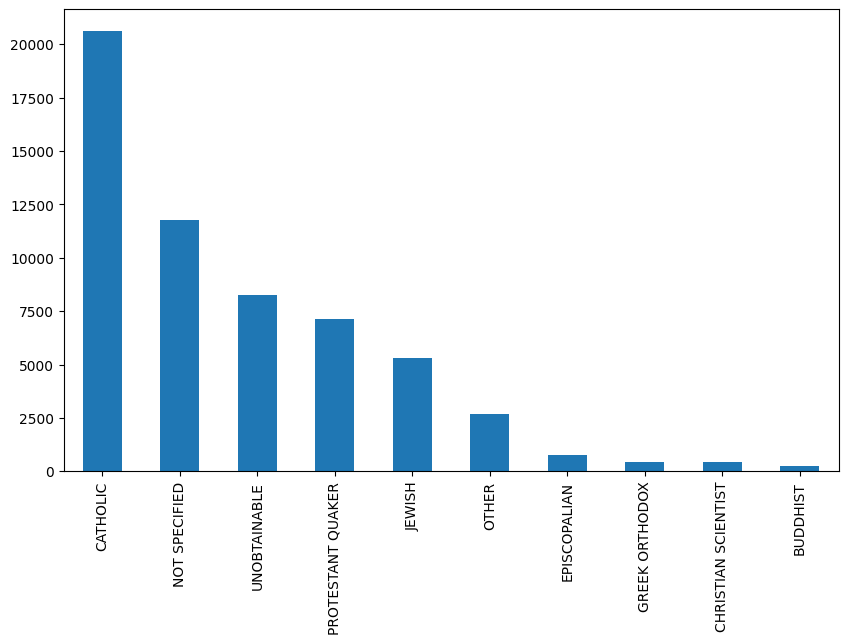


Column: MARITAL_STATUS


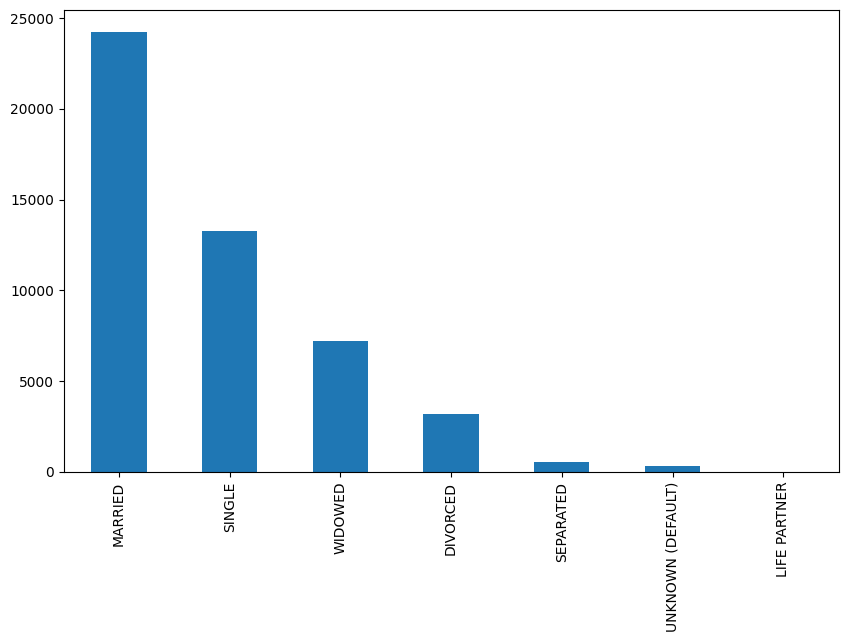


Column: ETHNICITY


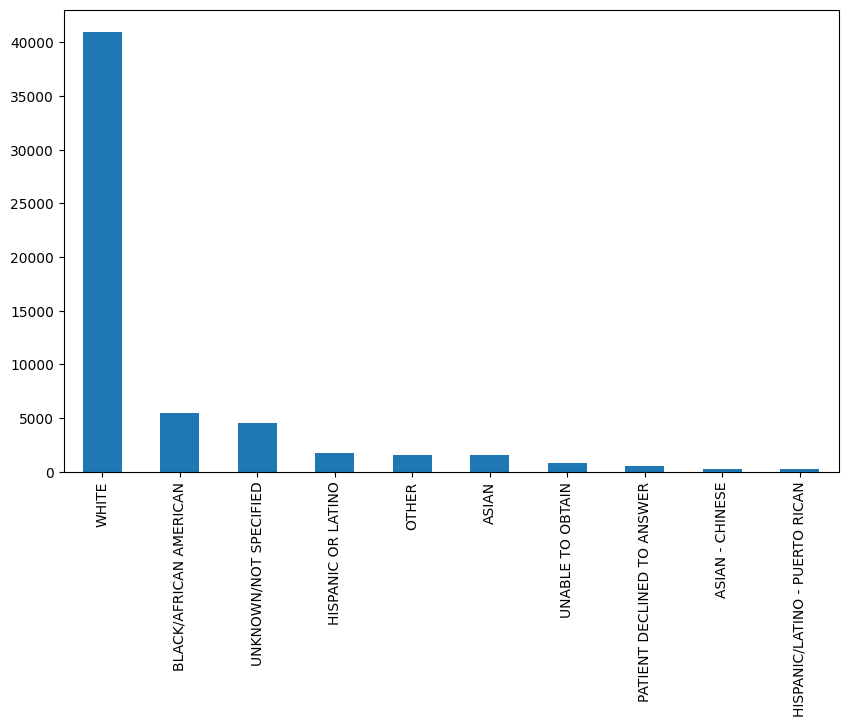


Column: DIAGNOSIS


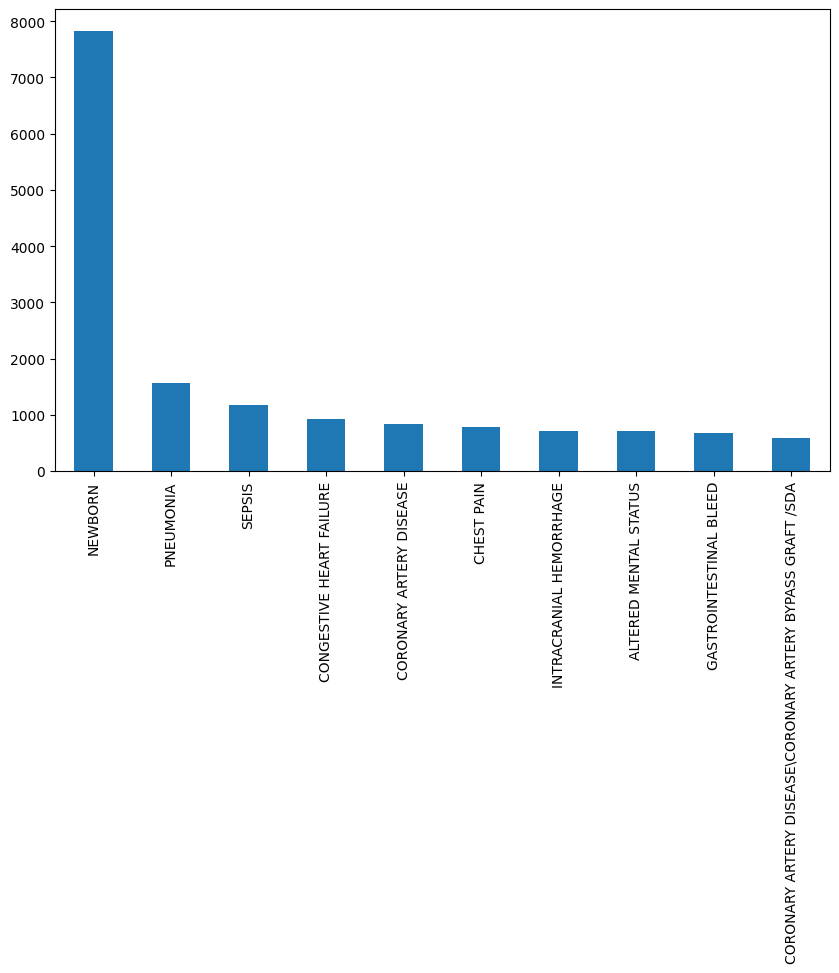


Correlation matrix:


<ipython-input-4-802aa2172fee>:58: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


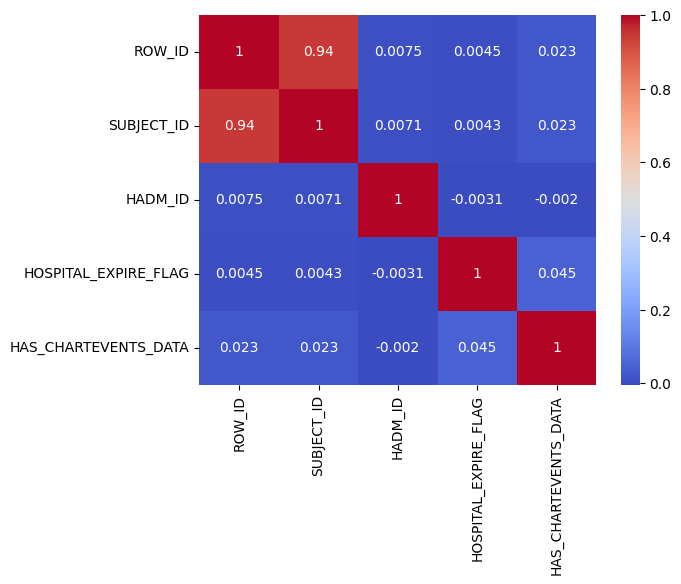


--------------------------------------------------

Exploring file: ICUSTAYS.csv

First few rows:
   ROW_ID  SUBJECT_ID  HADM_ID  ICUSTAY_ID DBSOURCE FIRST_CAREUNIT  \
0     365         268   110404      280836  carevue           MICU   
1     366         269   106296      206613  carevue           MICU   
2     367         270   188028      220345  carevue            CCU   
3     368         271   173727      249196  carevue           MICU   
4     369         272   164716      210407  carevue            CCU   

  LAST_CAREUNIT  FIRST_WARDID  LAST_WARDID              INTIME  \
0          MICU            52           52 2198-02-14 23:27:38   
1          MICU            52           52 2170-11-05 11:05:29   
2           CCU            57           57 2128-06-24 15:05:20   
3          SICU            52           23 2120-08-07 23:12:42   
4           CCU            57           57 2186-12-25 21:08:04   

              OUTTIME     LOS  
0 2198-02-18 05:26:11  3.2490  
1 2170-11-08 17:46:

<ipython-input-4-802aa2172fee>:32: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df.describe(include='all'))
<ipython-input-4-802aa2172fee>:32: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df.describe(include='all'))


              ROW_ID    SUBJECT_ID        HADM_ID     ICUSTAY_ID DBSOURCE  \
count   61532.000000  61532.000000   61532.000000   61532.000000    61532   
unique           NaN           NaN            NaN            NaN        3   
top              NaN           NaN            NaN            NaN  carevue   
freq             NaN           NaN            NaN            NaN    37776   
first            NaN           NaN            NaN            NaN      NaN   
last             NaN           NaN            NaN            NaN      NaN   
mean    30766.500000  33888.605912  149954.470649  249962.710248      NaN   
std     17762.902719  28127.690913   28898.895904   28890.574867      NaN   
min         1.000000      2.000000  100001.000000  200001.000000      NaN   
25%     15383.750000  12047.500000  124933.750000  224935.500000      NaN   
50%     30766.500000  24280.500000  149911.500000  249940.000000      NaN   
75%     46149.250000  54191.500000  174997.250000  274972.500000      NaN   

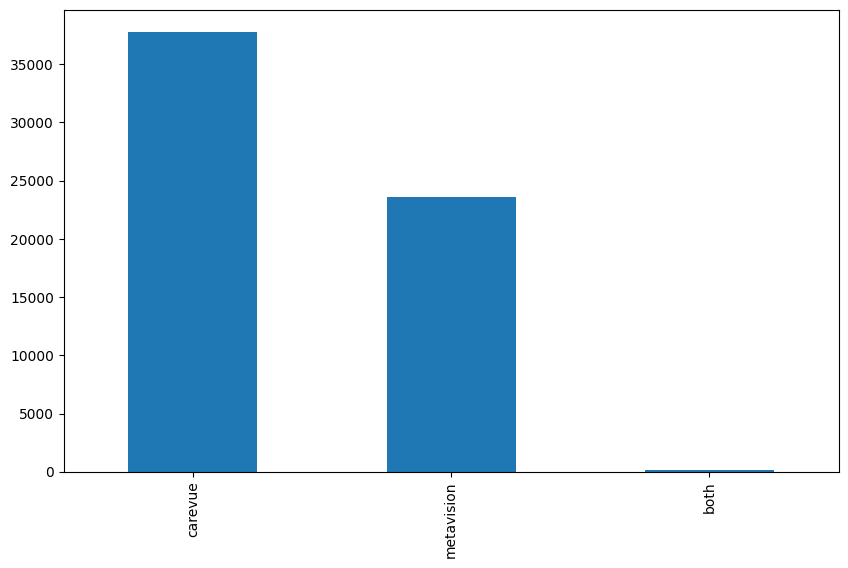


Column: FIRST_CAREUNIT


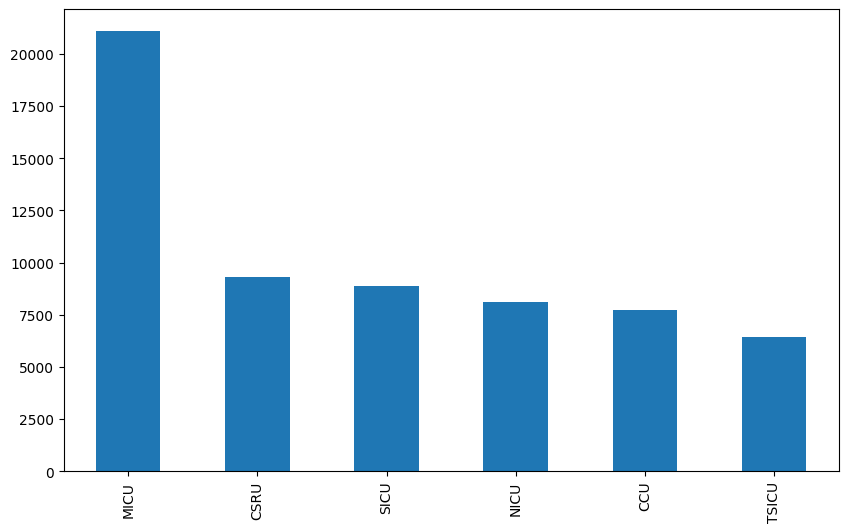


Column: LAST_CAREUNIT


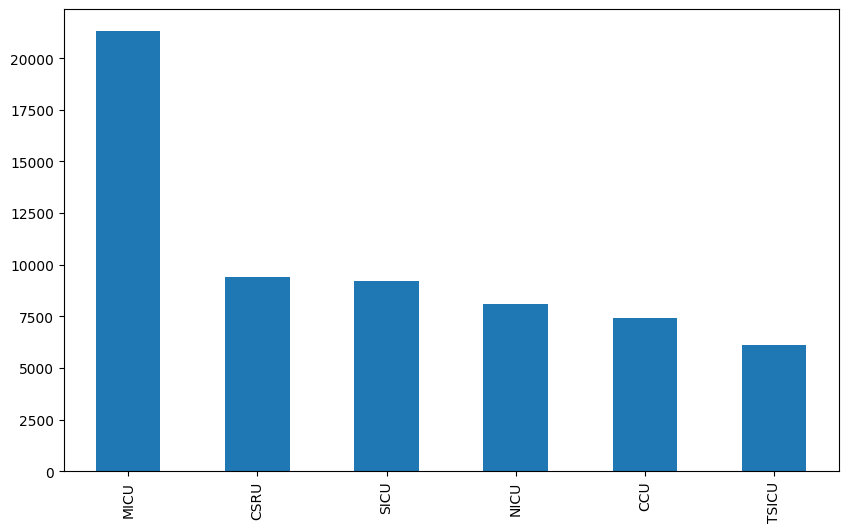


Correlation matrix:


<ipython-input-4-802aa2172fee>:58: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


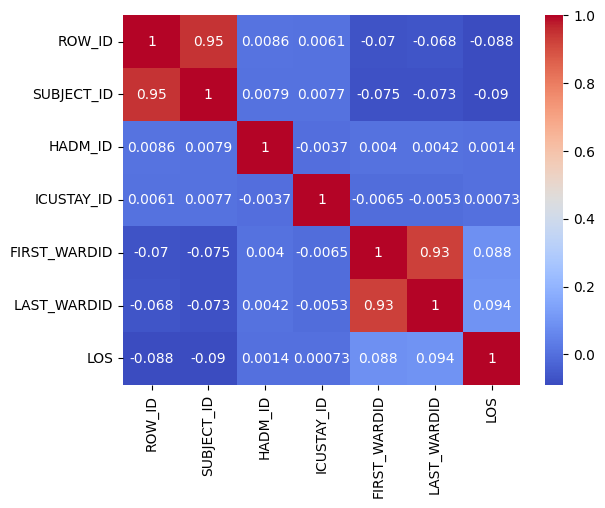


--------------------------------------------------

Exploring file: DIAGNOSES_ICD.csv

First few rows:
   ROW_ID  SUBJECT_ID  HADM_ID  SEQ_NUM ICD9_CODE
0    1297         109   172335      1.0     40301
1    1298         109   172335      2.0       486
2    1299         109   172335      3.0     58281
3    1300         109   172335      4.0      5855
4    1301         109   172335      5.0      4254

Summary statistics:
              ROW_ID     SUBJECT_ID        HADM_ID        SEQ_NUM ICD9_CODE
count   651047.00000  651047.000000  651047.000000  651000.000000    651000
unique           NaN            NaN            NaN            NaN      6984
top              NaN            NaN            NaN            NaN      4019
freq             NaN            NaN            NaN            NaN     20703
mean    325524.00000   38971.159758  150017.744819       7.913836       NaN
std     187941.22469   29372.198841   28878.068648       6.072633       NaN
min          1.00000       2.000000  100001

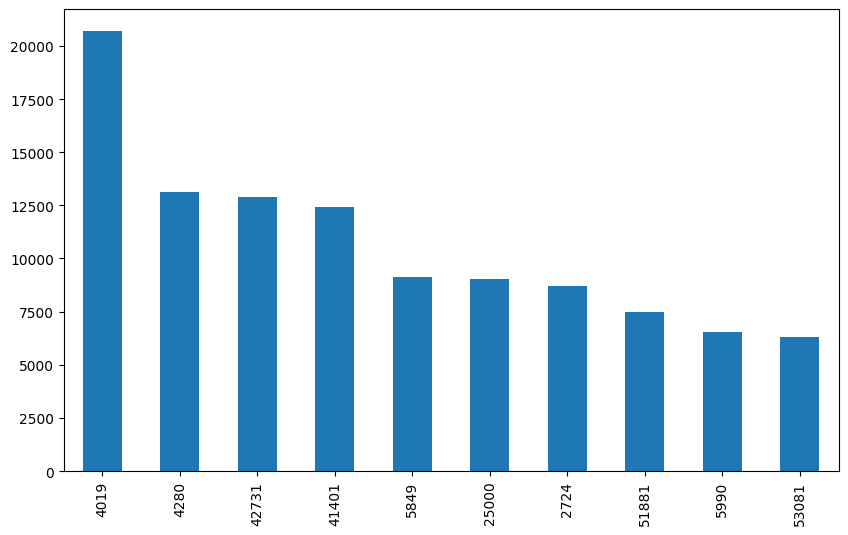


Correlation matrix:


<ipython-input-4-802aa2172fee>:58: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


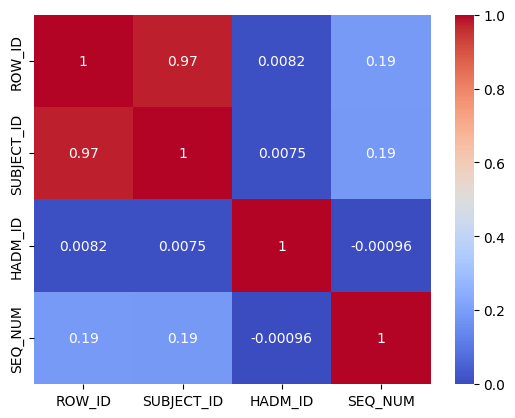


--------------------------------------------------

Exploring file: PRESCRIPTIONS.csv


<ipython-input-4-802aa2172fee>:19: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)



First few rows:
    ROW_ID  SUBJECT_ID  HADM_ID  ICUSTAY_ID  STARTDATE    ENDDATE DRUG_TYPE  \
0  2214776           6   107064         NaN 2175-06-11 2175-06-12      MAIN   
1  2214775           6   107064         NaN 2175-06-11 2175-06-12      MAIN   
2  2215524           6   107064         NaN 2175-06-11 2175-06-12      MAIN   
3  2216265           6   107064         NaN 2175-06-11 2175-06-12      BASE   
4  2214773           6   107064         NaN 2175-06-11 2175-06-12      MAIN   

             DRUG DRUG_NAME_POE DRUG_NAME_GENERIC FORMULARY_DRUG_CD     GSN  \
0      Tacrolimus    Tacrolimus        Tacrolimus             TACR1  021796   
1        Warfarin      Warfarin          Warfarin             WARF5  006562   
2  Heparin Sodium           NaN               NaN        HEPAPREMIX  006522   
3             D5W           NaN               NaN           HEPBASE     NaN   
4      Furosemide    Furosemide        Furosemide            FURO20  008208   

           NDC           PROD_STR

<ipython-input-4-802aa2172fee>:32: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df.describe(include='all'))
<ipython-input-4-802aa2172fee>:32: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df.describe(include='all'))


              ROW_ID    SUBJECT_ID       HADM_ID    ICUSTAY_ID  \
count   4.156450e+06  4.156450e+06  4.156450e+06  2.708742e+06   
unique           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN   
first            NaN           NaN           NaN           NaN   
last             NaN           NaN           NaN           NaN   
mean    2.078226e+06  3.877274e+04  1.501000e+05  2.500046e+05   
std     1.199864e+06  2.925289e+04  2.891754e+04  2.877529e+04   
min     1.000000e+00  2.000000e+00  1.000010e+05  2.000010e+05   
25%     1.039113e+06  1.457900e+04  1.251400e+05  2.250820e+05   
50%     2.078226e+06  2.857600e+04  1.501580e+05  2.501880e+05   
75%     3.117338e+06  6.317000e+04  1.752980e+05  2.748130e+05   
max     4.156450e+06  9.999900e+04  1.999990e+05  2.999990e+05   

                  STARTDATE              ENDDATE DRUG_TYPE  \
count        

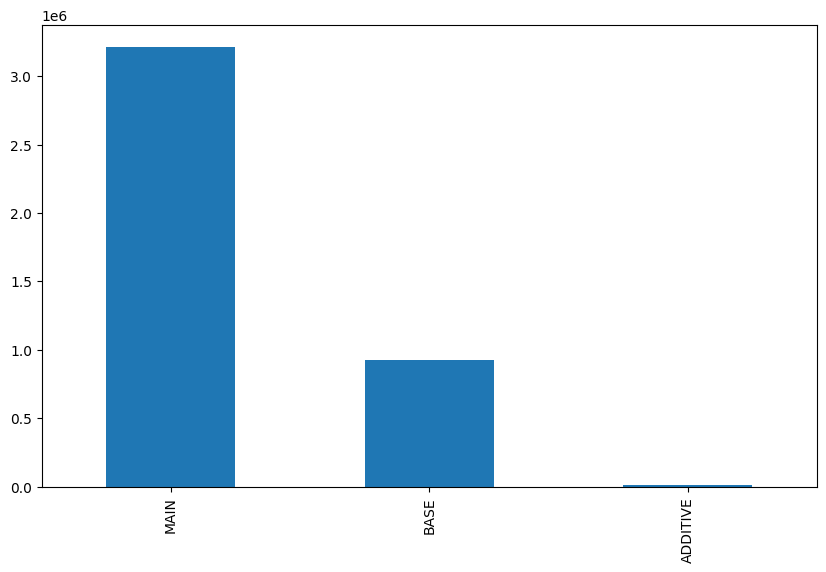


Column: DRUG


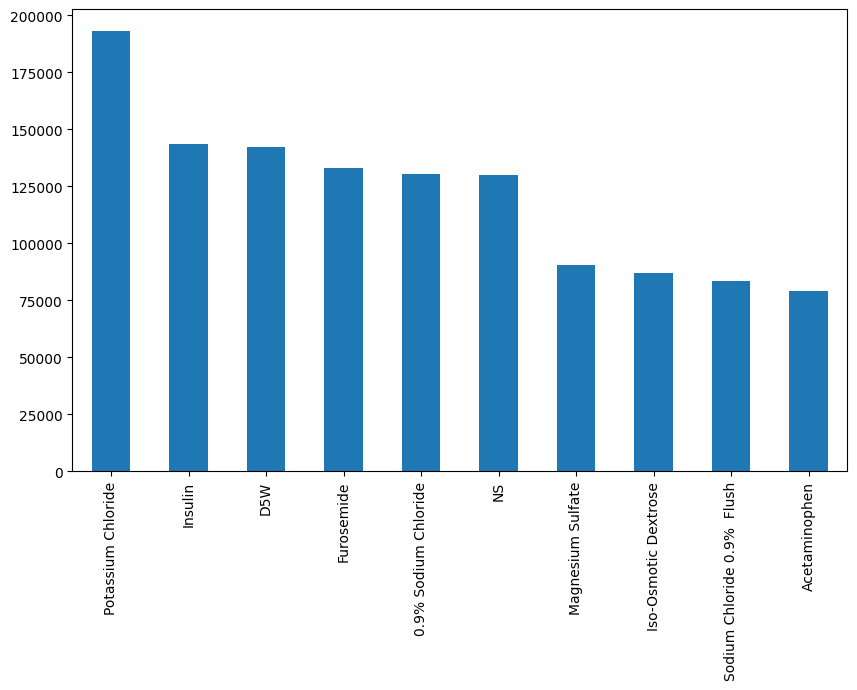


Column: DRUG_NAME_POE


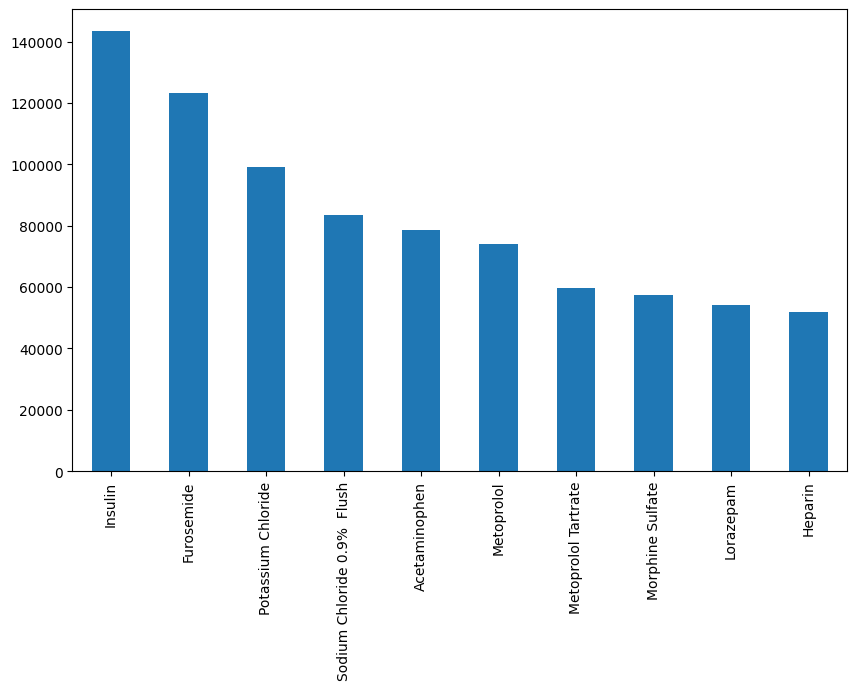


Column: DRUG_NAME_GENERIC


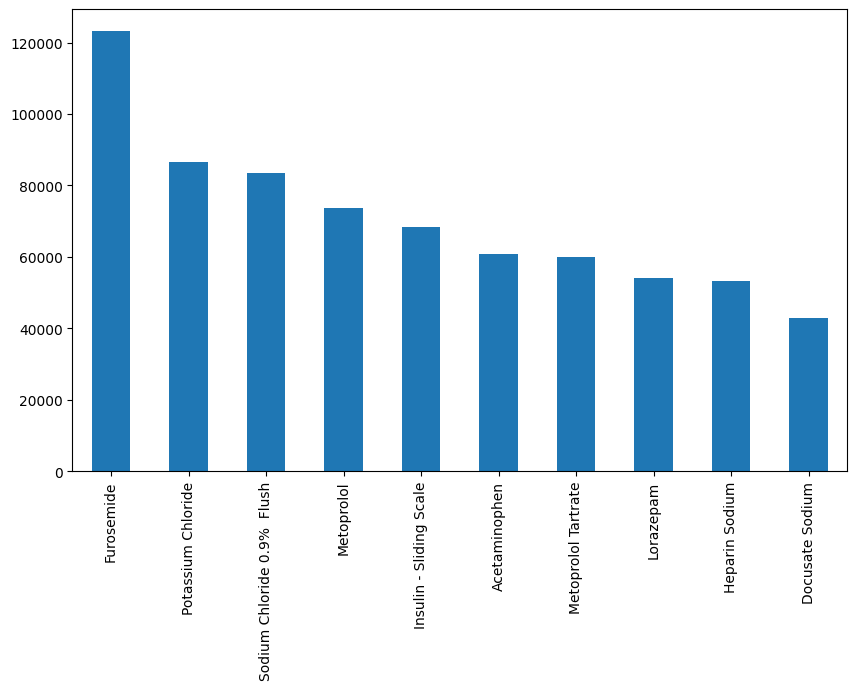


Column: FORMULARY_DRUG_CD


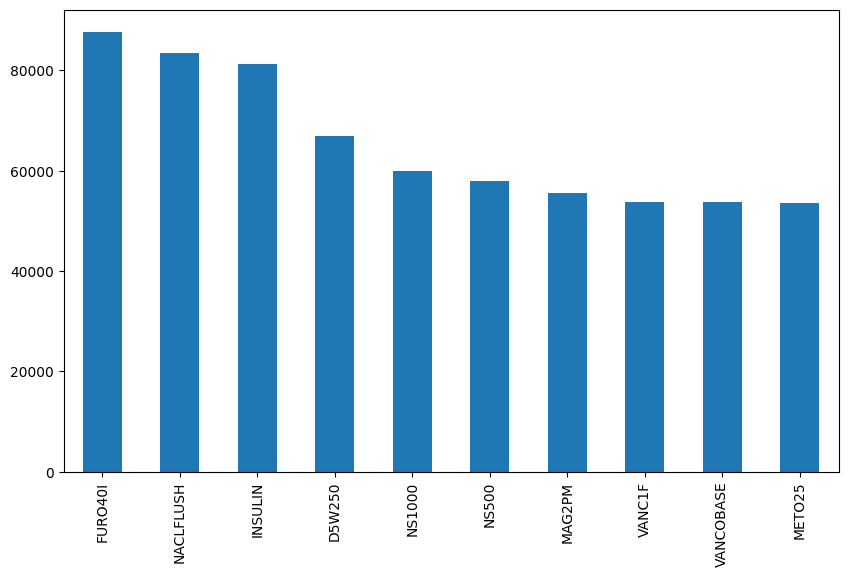


Column: GSN


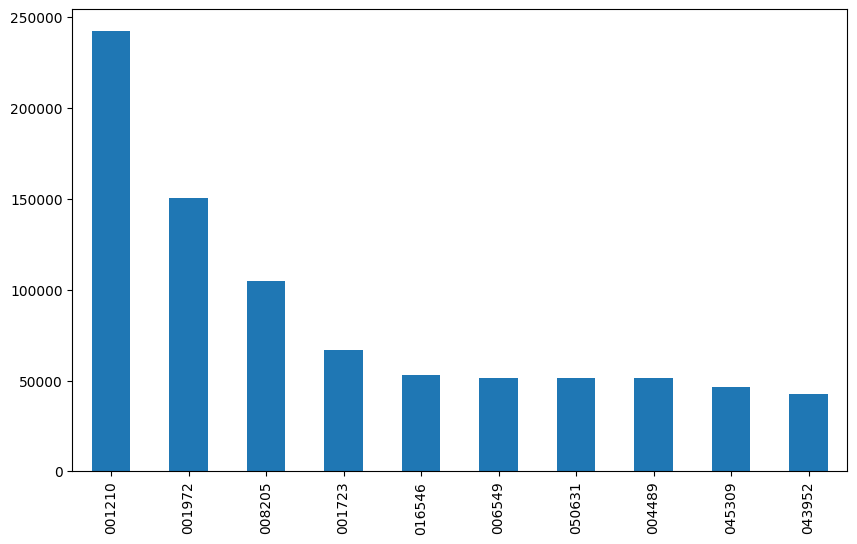


Column: PROD_STRENGTH


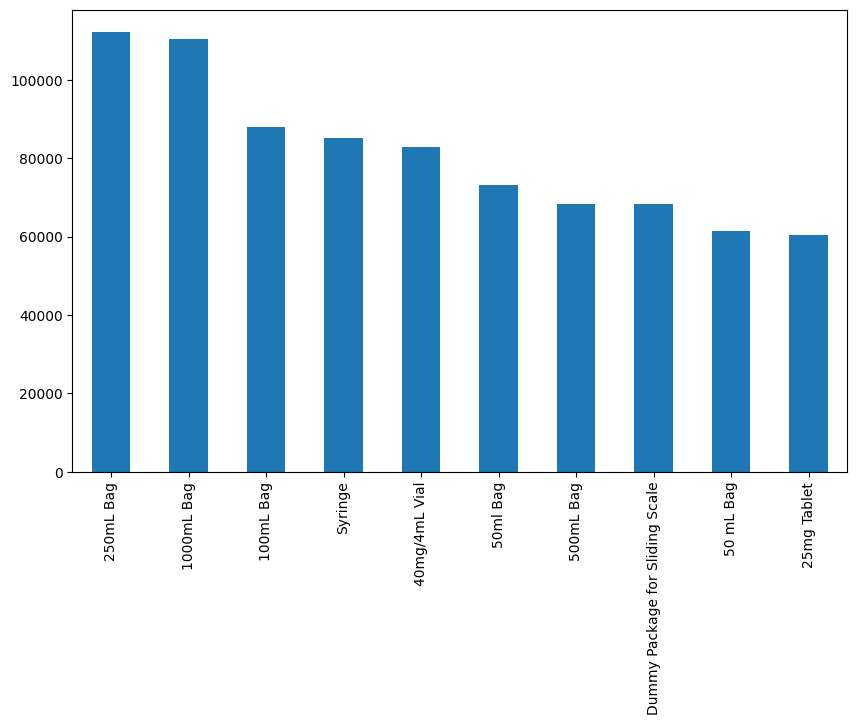


Column: DOSE_VAL_RX


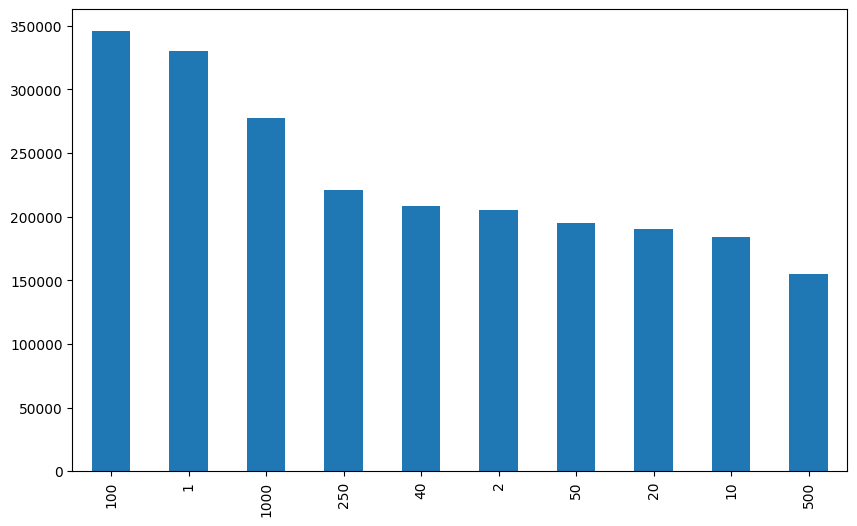


Column: DOSE_UNIT_RX


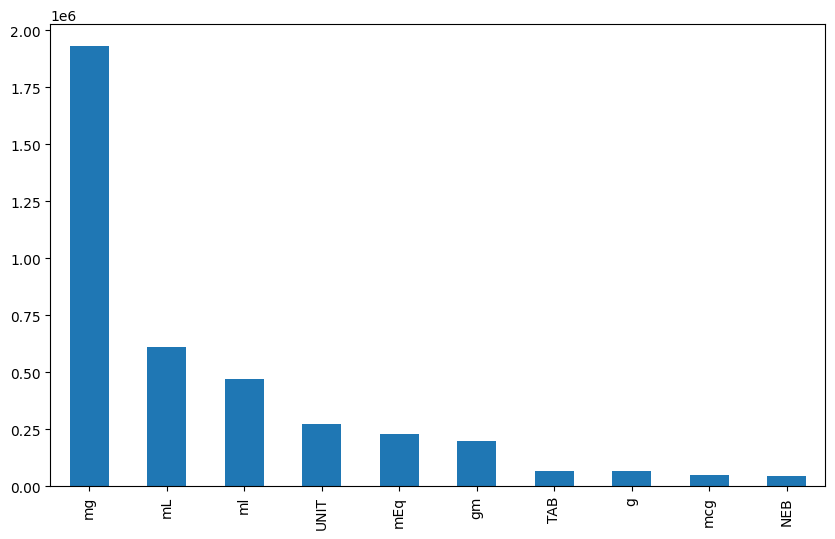


Column: FORM_VAL_DISP


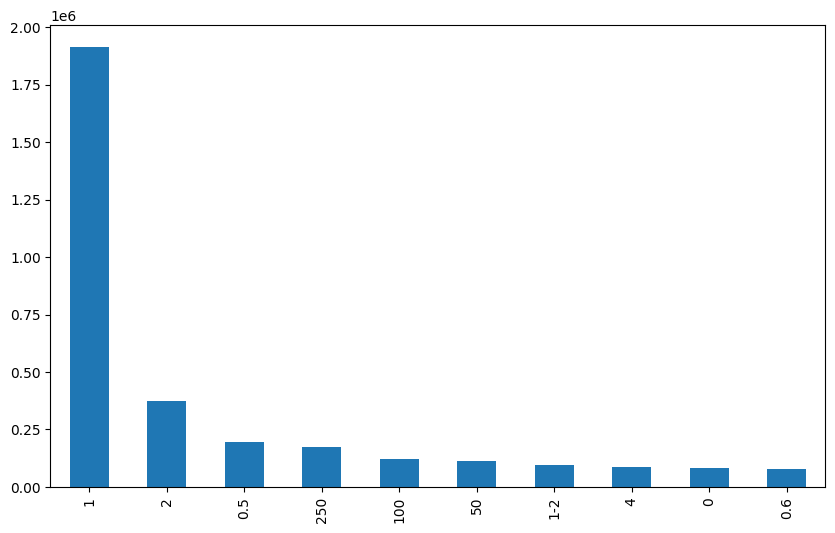


Column: FORM_UNIT_DISP


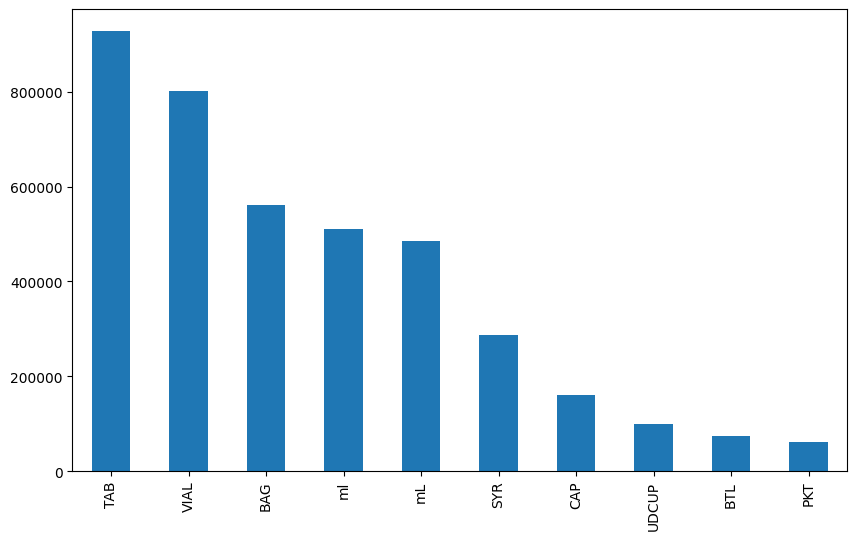


Column: ROUTE


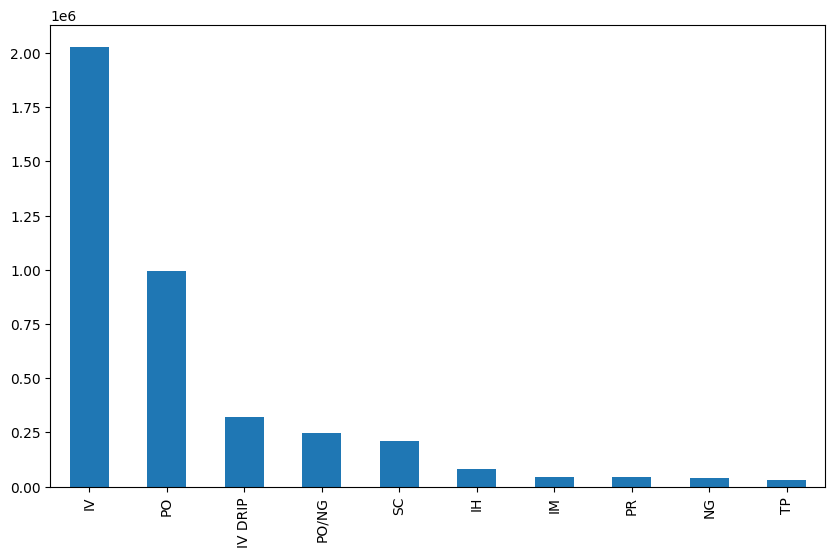


Correlation matrix:


<ipython-input-4-802aa2172fee>:58: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


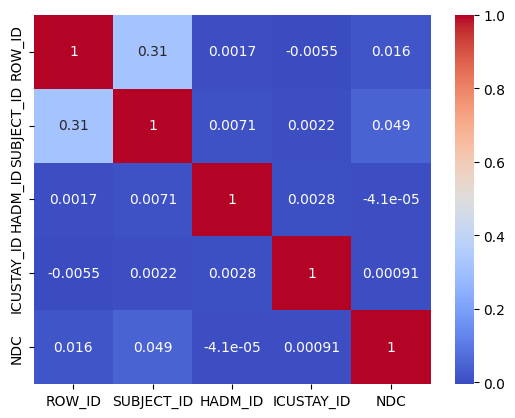


--------------------------------------------------



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of data files
files = ['PATIENTS.csv', 'ADMISSIONS.csv', 'ICUSTAYS.csv', 'DIAGNOSES_ICD.csv', 'PRESCRIPTIONS.csv']

date_cols = {'PATIENTS.csv': ['DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN'],
             'ADMISSIONS.csv': ['ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'EDREGTIME', 'EDOUTTIME'],
             'ICUSTAYS.csv': ['INTIME', 'OUTTIME'],
             'DIAGNOSES_ICD.csv': [],
             'PRESCRIPTIONS.csv': ['STARTDATE', 'ENDDATE']}

# Load and explore each file
for file in files:
    print(f'Exploring file: {file}')

    # Load the data
    df = pd.read_csv(file)

    # Convert date/time columns to datetime format
    for col in date_cols.get(file, []):
        if col in df.columns:
            df[col] = pd.to_datetime(df[col])

    # Print the first 5 rows
    print('\nFirst 5 rows:')
    print(df.head())

    # Get summary statistics
    print('\nSummary statistics:')
    print(df.describe(include='all'))

    # Get info on the DataFrame
    print('\nDataFrame info:')
    print(df.info())

    # Check for missing data
    print('\nMissing data:')
    print(df.isnull().sum())

    # Explore unique values in each column
    print('\nNumber of unique values in each column:')
    for col in df.columns:
        print(f'{col}: {df[col].nunique()}')

    # Explore distributions of categorical columns
    print('\nCounts of top categories in categorical columns:')
    for col in df.columns:
        if df[col].dtype == 'object':
            print(f'\nColumn: {col}')
            plt.figure(figsize=(10, 6))
            df[col].value_counts().head(10).plot(kind='bar')
            plt.show()

    # Correlations between numeric columns
    print('\nCorrelation matrix:')
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.show()

    print('\n' + '-' * 50 + '\n')


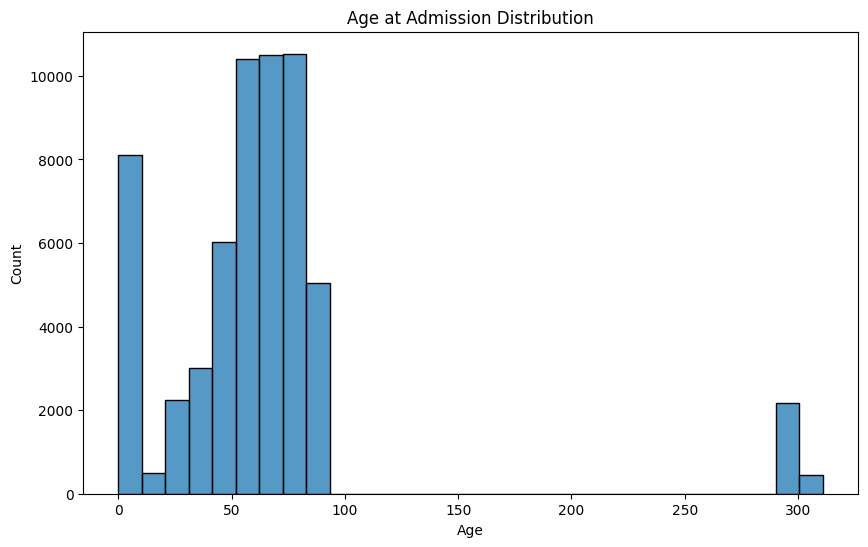

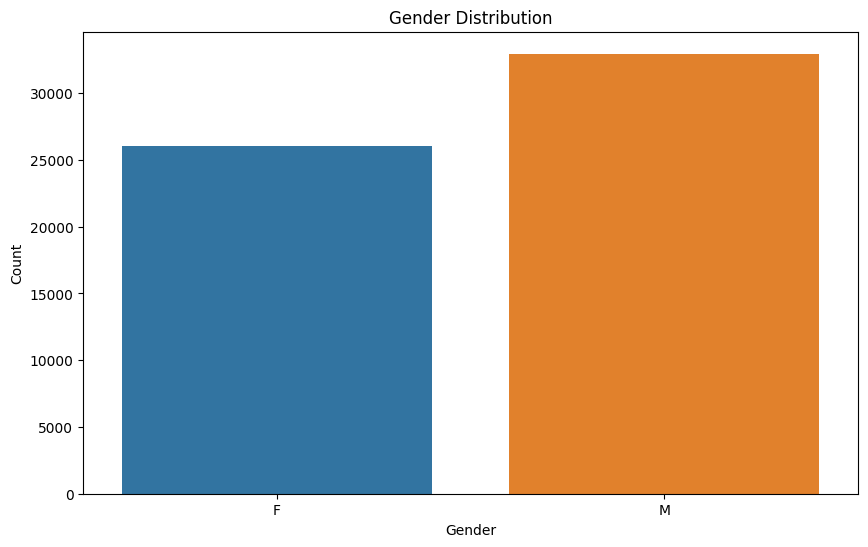

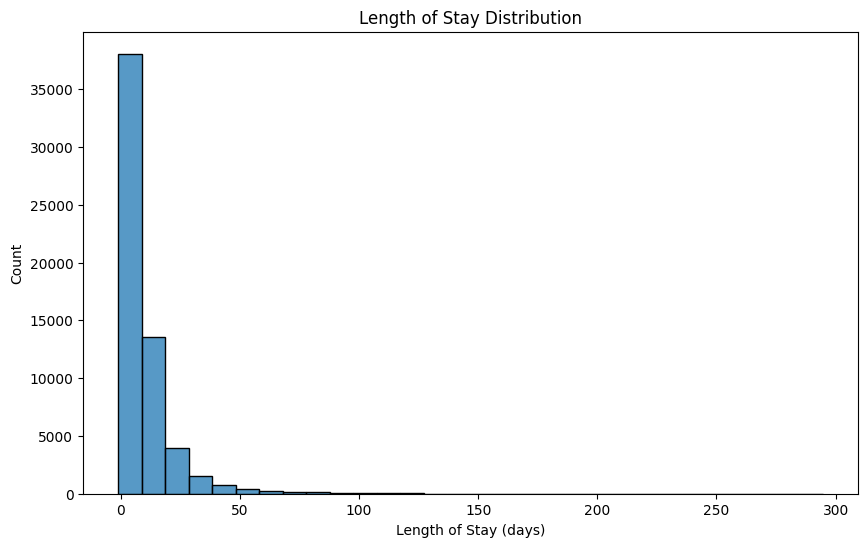

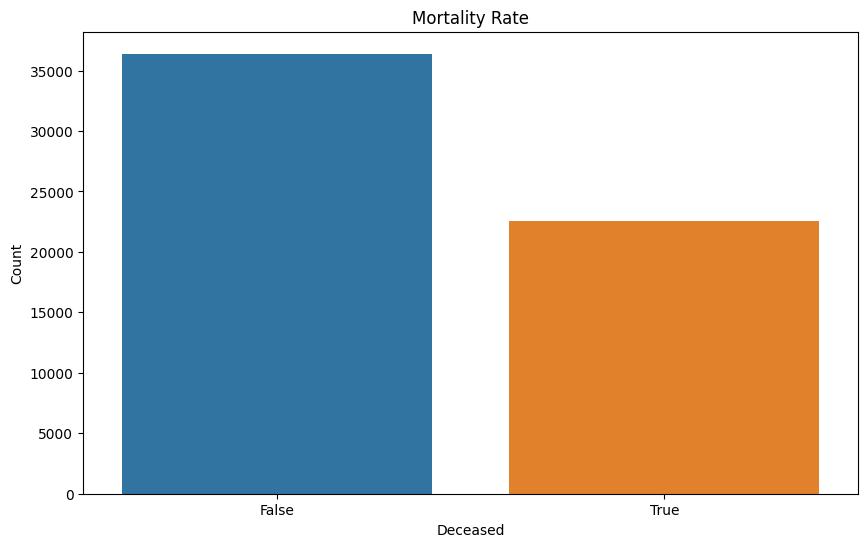

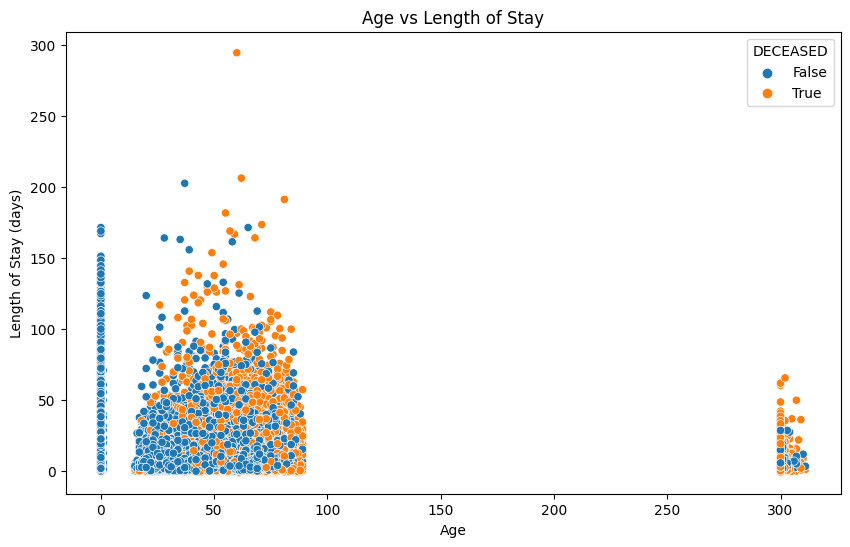

In [5]:
# Load data
admissions_df = pd.read_csv('ADMISSIONS.csv', parse_dates=['ADMITTIME', 'DISCHTIME'])
patients_df = pd.read_csv('PATIENTS.csv', parse_dates=['DOB', 'DOD'])

# Merge datasets on SUBJECT_ID
df = pd.merge(admissions_df, patients_df, on='SUBJECT_ID', how='inner')

# Convert birth dates to age at time of admission
df['AGE'] = (df['ADMITTIME'].dt.year - df['DOB'].dt.year)
df.loc[df.AGE < 0, 'AGE'] = 90  # Handle negative ages due to de-identification

# Explore age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=30, kde=False)
plt.title('Age at Admission Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Explore gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='GENDER', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Explore distribution of length of stay
df['LENGTH_OF_STAY'] = (df['DISCHTIME'] - df['ADMITTIME']).dt.total_seconds() / (24 * 60 * 60)
plt.figure(figsize=(10, 6))
sns.histplot(df['LENGTH_OF_STAY'], bins=30, kde=False)
plt.title('Length of Stay Distribution')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Count')
plt.show()

# Explore mortality rate
df['DECEASED'] = df['DOD'].notna()
plt.figure(figsize=(10, 6))
sns.countplot(x='DECEASED', data=df)
plt.title('Mortality Rate')
plt.xlabel('Deceased')
plt.ylabel('Count')
plt.show()

# Explore the relationship between age and length of stay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AGE', y='LENGTH_OF_STAY', hue='DECEASED', data=df)
plt.title('Age vs Length of Stay')
plt.xlabel('Age')
plt.ylabel('Length of Stay (days)')
plt.show()


                                  DIAGNOSIS                  DRUG COUNT
0        Unspecified essential hypertension    Potassium Chloride   184
1        Unspecified essential hypertension                   D5W   170
2        Unspecified essential hypertension            Metoprolol   154
3        Unspecified essential hypertension                    NS   153
4        Unspecified essential hypertension            Furosemide   129
...                                     ...                   ...   ...
20795  Other and unspecified hyperlipidemia  0.9% Sodium Chloride    91
20796  Other and unspecified hyperlipidemia            Furosemide    80
20797  Other and unspecified hyperlipidemia               Insulin    69
20798  Other and unspecified hyperlipidemia   Metoprolol Tartrate    64
20799  Other and unspecified hyperlipidemia    Potassium Chloride    56

[20800 rows x 3 columns]


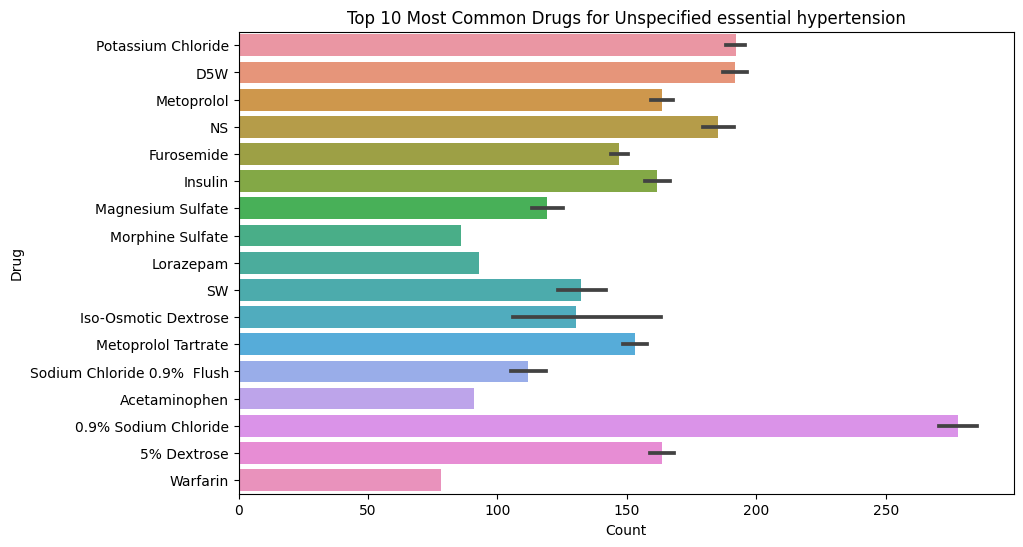

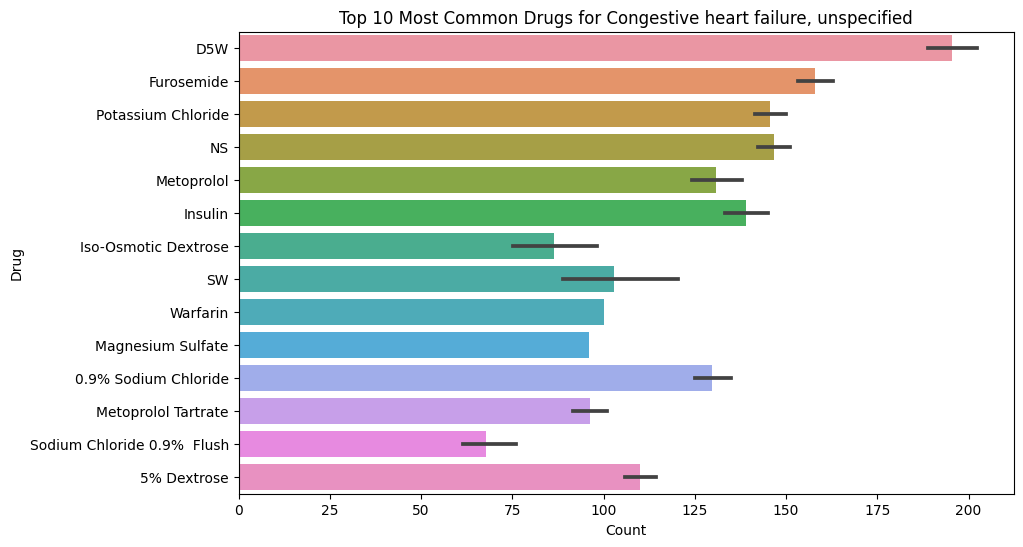

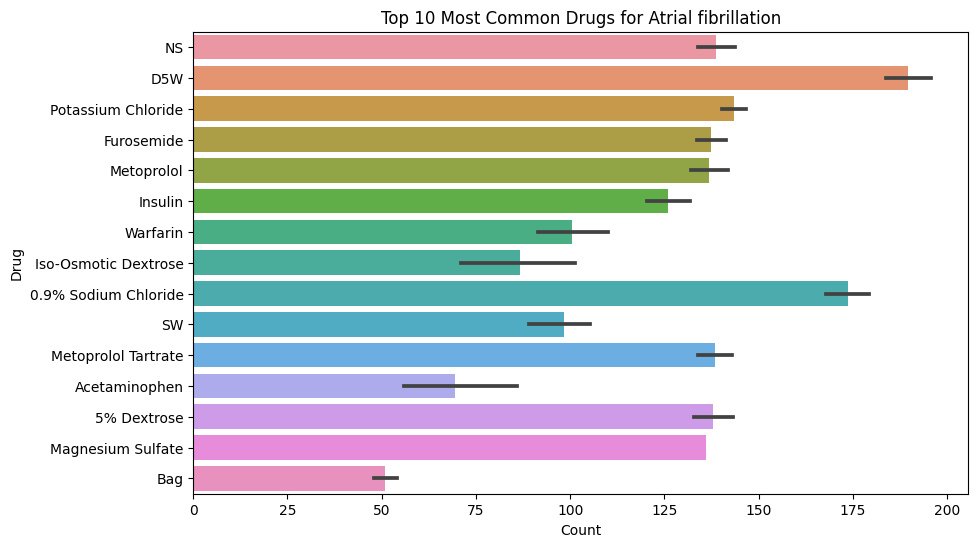

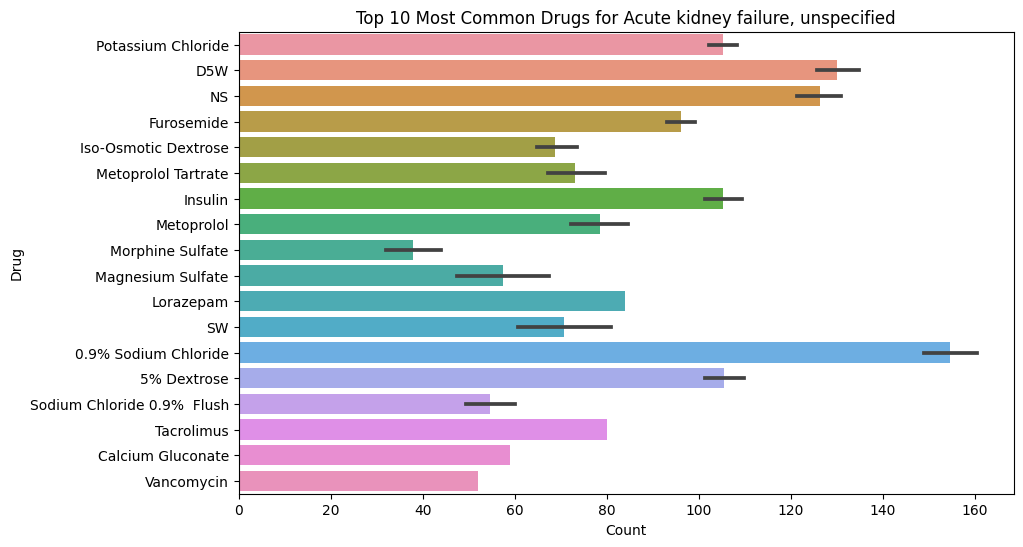

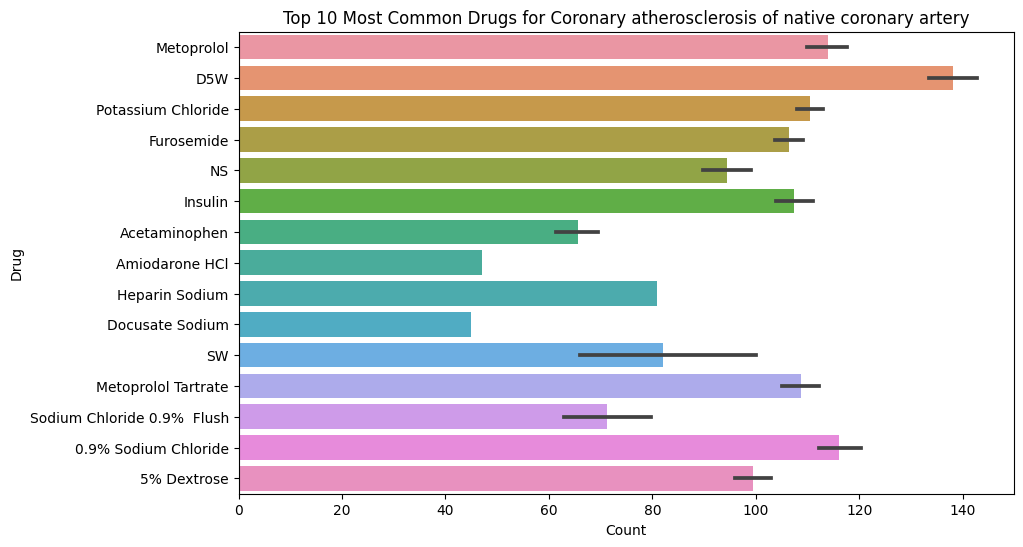

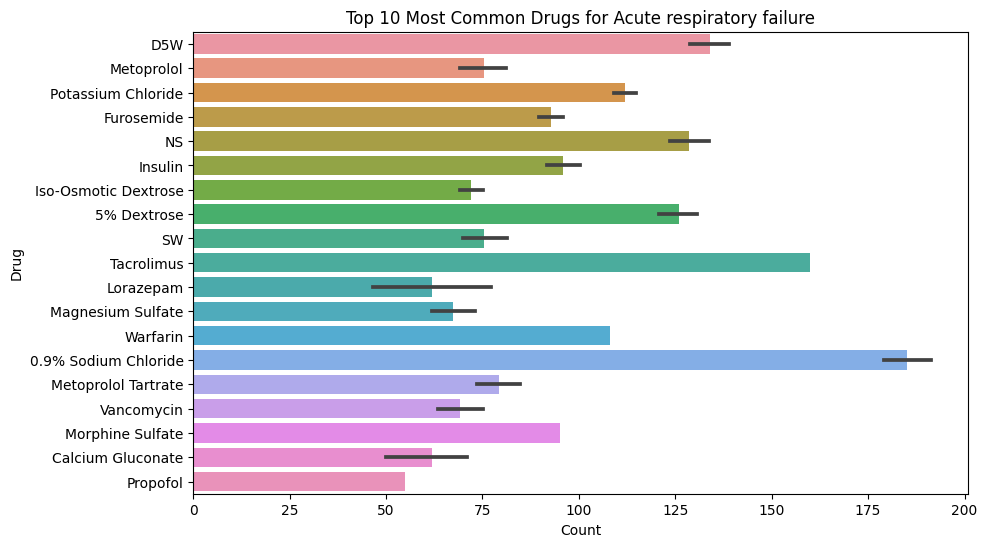

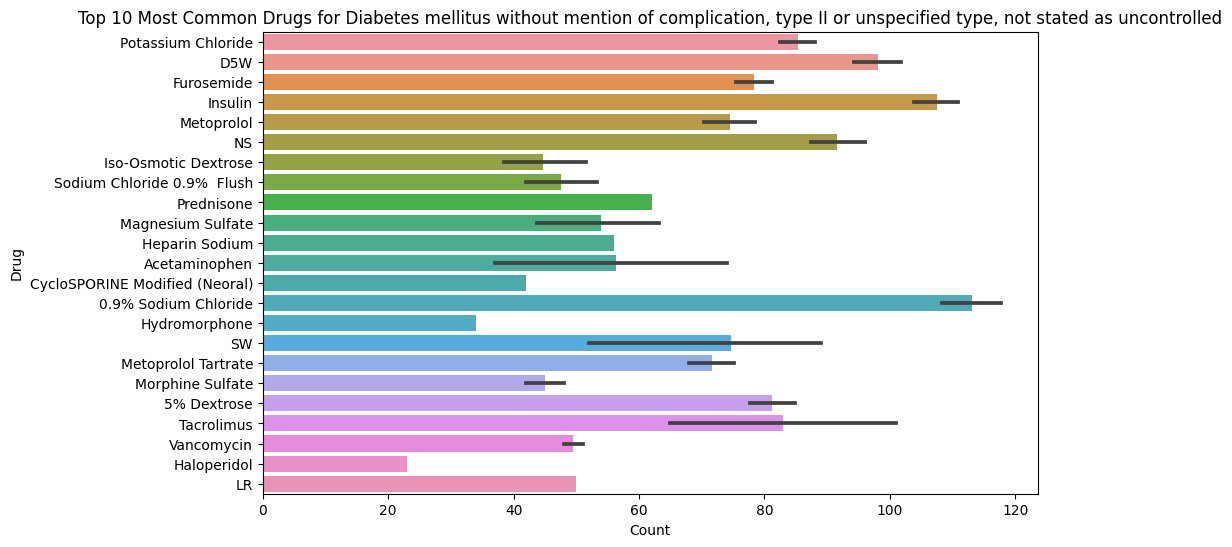

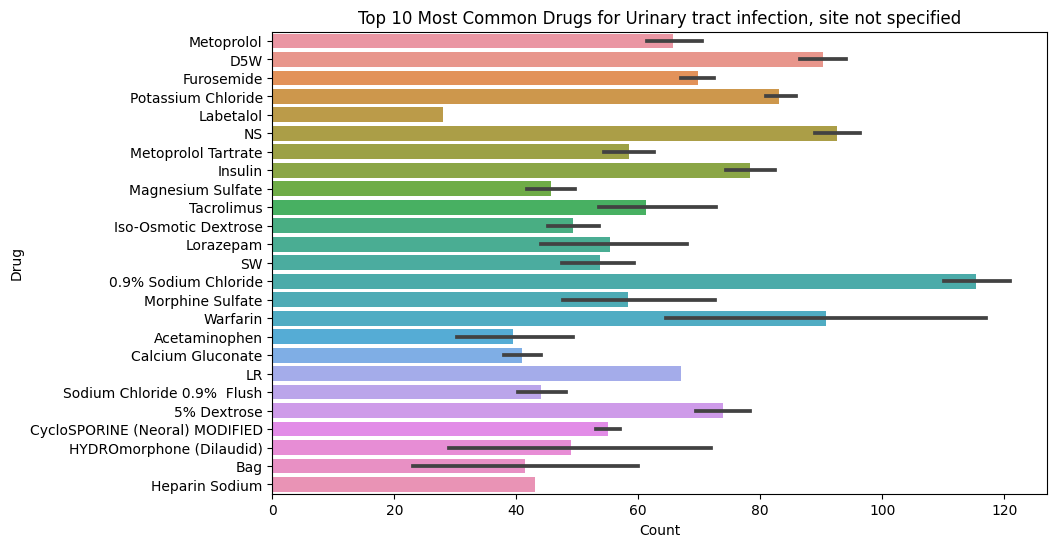

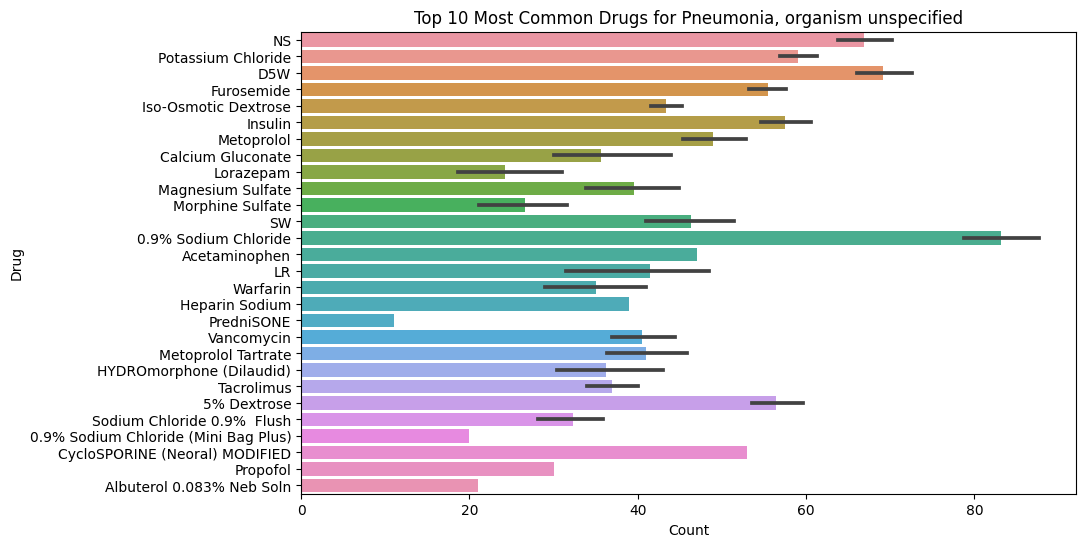

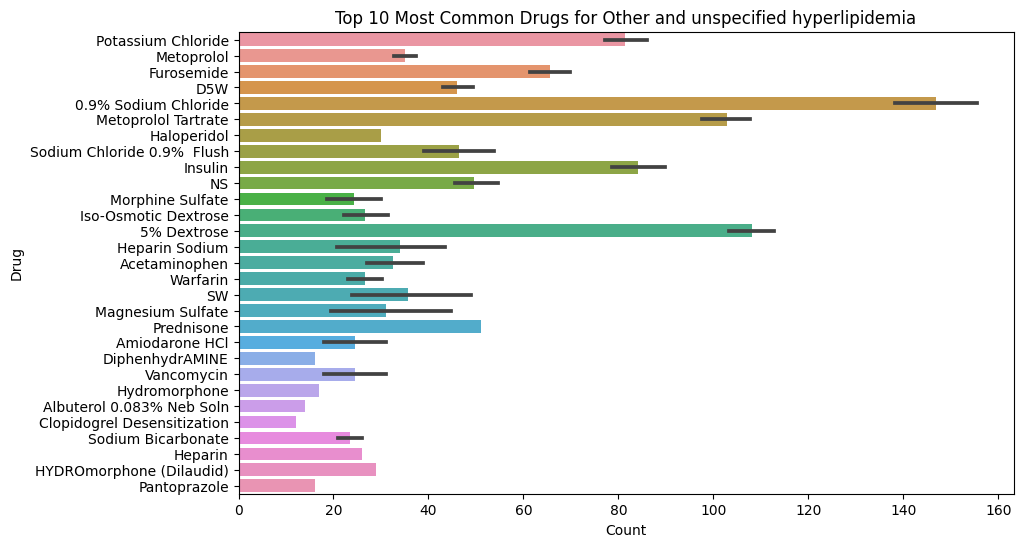

In [12]:
# Load the DIAGNOSES_ICD data
diagnoses_df = pd.read_csv('DIAGNOSES_ICD.csv')

# Load the D_ICD_DIAGNOSES data (to map codes to diagnoses)
d_icd_diagnoses_df = pd.read_csv('D_ICD_DIAGNOSES.csv')

# Merge DIAGNOSES_ICD and D_ICD_DIAGNOSES on ICD9_CODE
diagnoses_df = pd.merge(diagnoses_df, d_icd_diagnoses_df, on='ICD9_CODE', how='left')

# Merge diagnoses_df with df on SUBJECT_ID and HADM_ID
merged_df = pd.merge(df, diagnoses_df, on=['SUBJECT_ID', 'HADM_ID'], how='left')

# Find the most common diagnoses for deceased patients
common_diagnoses = merged_df[merged_df['DOD'].notna()]['LONG_TITLE'].value_counts().head(10)

# Load the PRESCRIPTIONS data in chunks
prescriptions_iter = pd.read_csv('PRESCRIPTIONS.csv', chunksize=10000)

# Prepare an empty DataFrame to store drug counts for each diagnosis
drug_counts = pd.DataFrame(columns=['DIAGNOSIS', 'DRUG', 'COUNT'])

# Process each chunk separately and add drug counts to the DataFrame
for prescriptions_chunk in prescriptions_iter:
    # Merge prescriptions_chunk with merged_df on SUBJECT_ID and HADM_ID
    merged_chunk = pd.merge(merged_df, prescriptions_chunk, on=['SUBJECT_ID', 'HADM_ID'], how='inner')

    # For each of the common diagnoses, find and count the most common drugs
    for diagnosis in common_diagnoses.index:
        common_drugs = merged_chunk[merged_chunk['LONG_TITLE'] == diagnosis]['DRUG'].value_counts().head(5)

        for drug, count in common_drugs.items():
            temp_df = pd.DataFrame({'DIAGNOSIS': [diagnosis], 'DRUG': [drug], 'COUNT': [count]})
            drug_counts = pd.concat([drug_counts, temp_df], ignore_index=True)

# Print the drug counts DataFrame
print(drug_counts)

# Plot the drug counts for each diagnosis
for diagnosis in common_diagnoses.index:
    plt.figure(figsize=(10, 6))

    diagnosis_drugs = drug_counts[drug_counts['DIAGNOSIS'] == diagnosis]
    sns.barplot(y='DRUG', x='COUNT', data=diagnosis_drugs, orient='h')

    plt.title(f'Top 10 Most Common Drugs for {diagnosis}')
    plt.xlabel('Count')
    plt.ylabel('Drug')
    plt.show()

                     AGE  LENGTH_OF_STAY
AGE             1.000000       -0.053311
LENGTH_OF_STAY -0.053311        1.000000


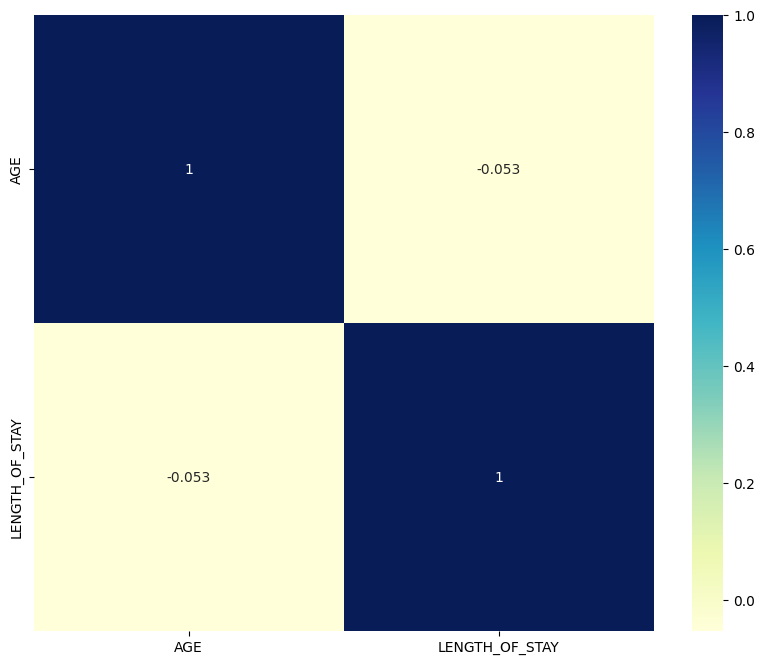

In [8]:
# Print the correlation matrix
correlation_matrix = df[['AGE', 'LENGTH_OF_STAY']].corr()
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.show()


GENDER
F    10.046397
M    10.203044
Name: LENGTH_OF_STAY, dtype: float64


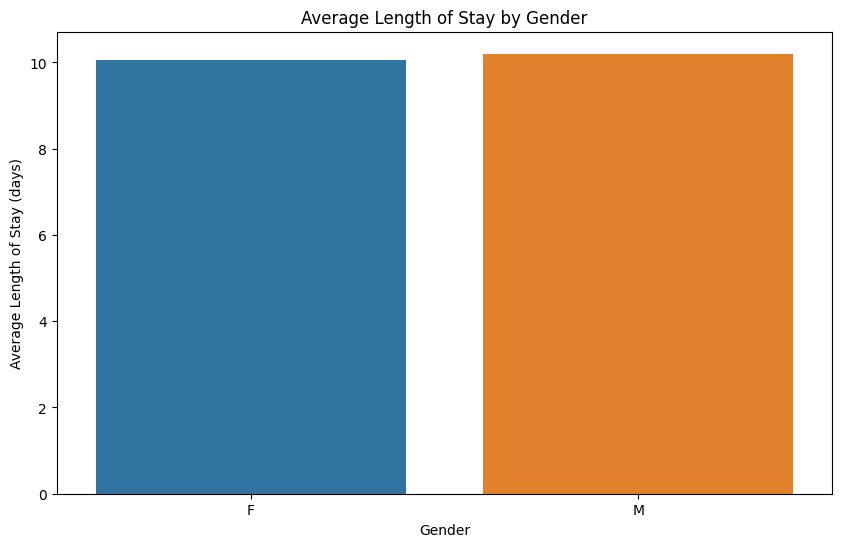

In [9]:
# Group the data by gender and calculate the mean length of stay for each group
grouped = df.groupby('GENDER')['LENGTH_OF_STAY'].mean()

# Print the grouped data
print(grouped)

# Visualize the data
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped.index, y=grouped.values)
plt.title('Average Length of Stay by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Length of Stay (days)')
plt.show()
